In [3]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.set_option('display.max_columns', None)

data = pd.read_csv("data (1).csv",encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.00,United Kingdom


In [4]:
#Data preprocessing
print(f'Duplicate Items in Dataset:{data.duplicated().sum()}')

Duplicate Items in Dataset:5268


In [5]:
#Removing duplicate items
data = data[~data.duplicated()]

In [6]:
#checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [7]:
invoice_list = data[data.CustomerID.isnull()]['InvoiceNo'].tolist()
print(invoice_list[:10])

['536414', '536544', '536544', '536544', '536544', '536544', '536544', '536544', '536544', '536544']


In [8]:
len(data[data.InvoiceNo.isin(invoice_list)])

135037

In [9]:
print("The number of records with Quantity Negative and Prices 0 or Vice versa : ",data[(data.Quantity<=0) & (data.UnitPrice<=0)].shape[0])
 
print("Cancelled Items have Invoice Starting with : ",data.loc[(data.Quantity<0) & ~(data.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())

#Checking for Records with Negative Unit Price
print("The number of transactions with Negative Unit Price : ",data[(data.UnitPrice<0)].shape[0])

#Checking for Records with Unit Price 0
print("The number of transactions with Unit Price 0 : ",data[(data.UnitPrice==0)  & ~(data.CustomerID.isnull())].shape[0])

The number of records with Quantity Negative and Prices 0 or Vice versa :  1336
Cancelled Items have Invoice Starting with :  ['C']
The number of transactions with Negative Unit Price :  2
The number of transactions with Unit Price 0 :  40


In [10]:
data = data[data.CustomerID.notnull()]

In [11]:
rfm_train = data.copy()

In [12]:
rfm_train.CustomerID = (rfm_train.CustomerID).astype(int)

In [13]:
print(f'Count of Missing values:{rfm_train.isnull().sum()}')

Count of Missing values:InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [14]:
placed = rfm_train[~rfm_train.InvoiceNo.str.contains('C',na=False)]

In [15]:
placed['TotalCost'] = rfm_train.Quantity * rfm_train.UnitPrice

C:\Users\prash\AppData\Local\Temp\ipykernel_4136\140923902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed['TotalCost'] = rfm_train.Quantity * rfm_train.UnitPrice


In [16]:
#Performing eda
print(f'Oldest date is:{placed.InvoiceDate.min()}\n')
print(f'Latest date is:{placed.InvoiceDate.max()}\n')

Oldest date is:01-04-2011 10:00

Latest date is:9/30/2011 9:45



In [17]:
placed.Country.value_counts(normalize=True).head(12).mul(100).round(1).astype(str)+'%'

United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Norway             0.3%
Italy              0.2%
Name: Country, dtype: object

C:\Users\prash\AppData\Local\Temp\ipykernel_4136\1678684506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed['InvoiceDate'] = pd.to_datetime(placed['InvoiceDate'], errors='coerce')


<AxesSubplot:>

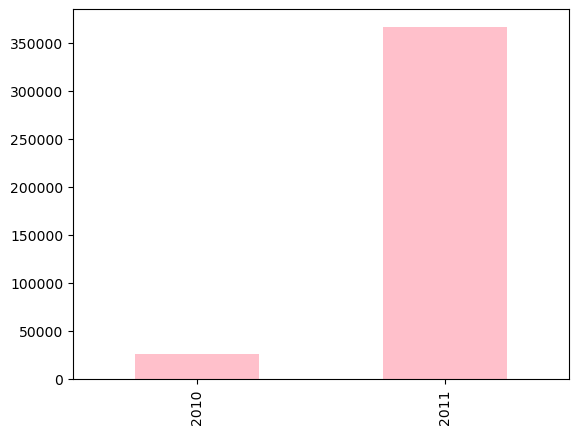

In [18]:

placed['InvoiceDate'] = pd.to_datetime(placed['InvoiceDate'], errors='coerce')
placed.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar',color='pink')


<AxesSubplot:>

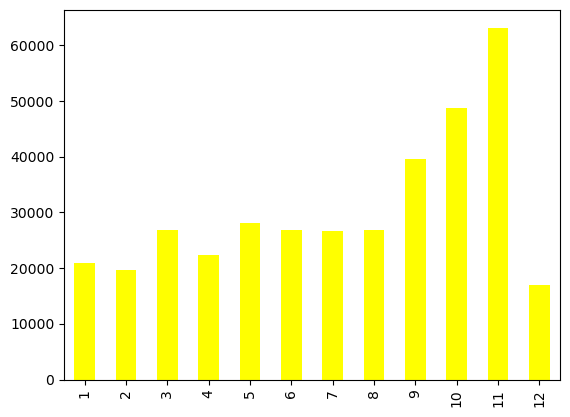

In [19]:
placed[placed.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar',color='yellow')

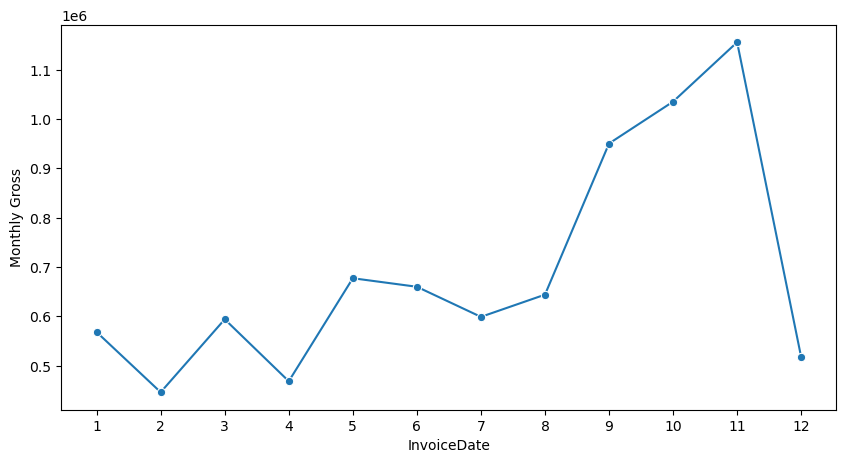

In [20]:
#monthly grows
monthly_gross = placed[placed.InvoiceDate.dt.year==2011].groupby(placed.InvoiceDate.dt.month).TotalCost.sum()
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index,marker='o')
plt.xticks(range(1,13))
plt.ylabel('Monthly Gross')
plt.show()
     

C:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<AxesSubplot:ylabel='UnitPrice'>

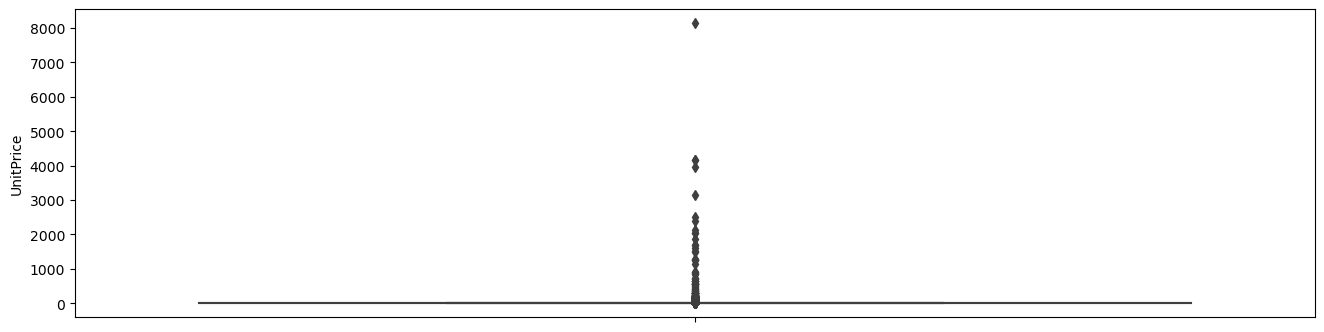

In [21]:
plt.figure(figsize=(16,4))
sns.boxplot(y='UnitPrice',data = placed,orient='h')

In [22]:
placed.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


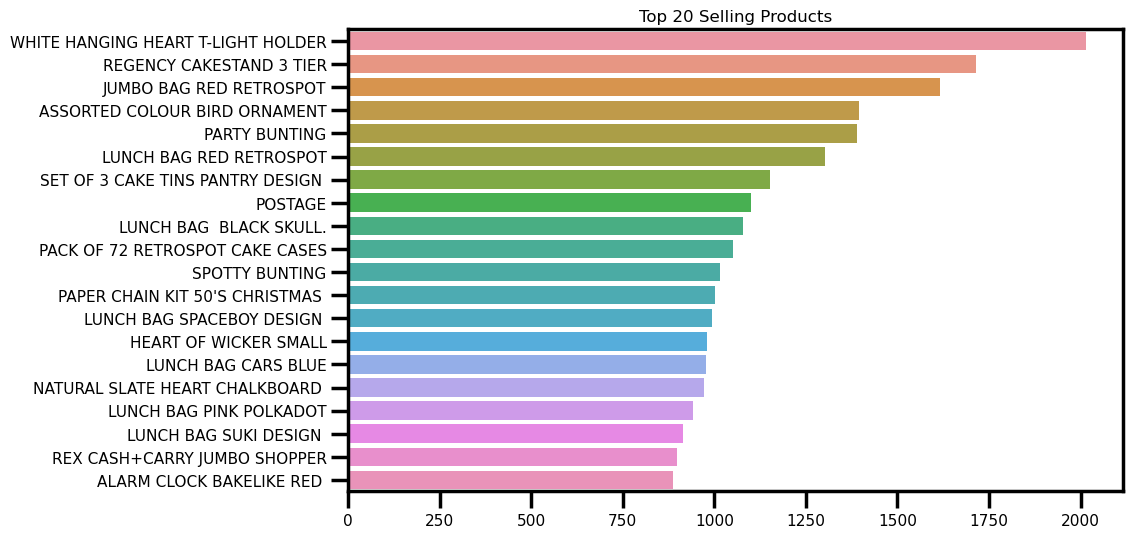

In [23]:

top_products = placed['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("poster",font_scale=0.5)
sns.barplot(y=top_products.index,x=top_products.values)
plt.title('Top 20 Selling Products')
plt.show()

In [25]:
rfm_train = data.copy()
cohort = rfm_train.copy()

cohort['InvoiceDate'] = pd.to_datetime(cohort['InvoiceDate'], errors='coerce')

# Define a function that will parse the date

import datetime as dt

def get_month(x):
    return dt.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')


def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month


# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

# Calculate difference in years
years_diff = invoice_year - cohort_year
#print(years_diff)
# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1
cohort.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.00,United Kingdom,2011-12-01,2011-05-01,8
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.00,United Kingdom,2011-12-01,2010-12-01,13
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.00,United Kingdom,2011-12-01,2010-12-01,13
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.00,United Kingdom,2011-12-01,2010-12-01,13
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.00,United Kingdom,2011-12-01,2010-12-01,13
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.00,France,2011-12-01,2011-08-01,5
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.00,France,2011-12-01,2011-08-01,5
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.00,France,2011-12-01,2011-08-01,5
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.00,France,2011-12-01,2011-08-01,5
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.00,France,2011-12-01,2011-08-01,5


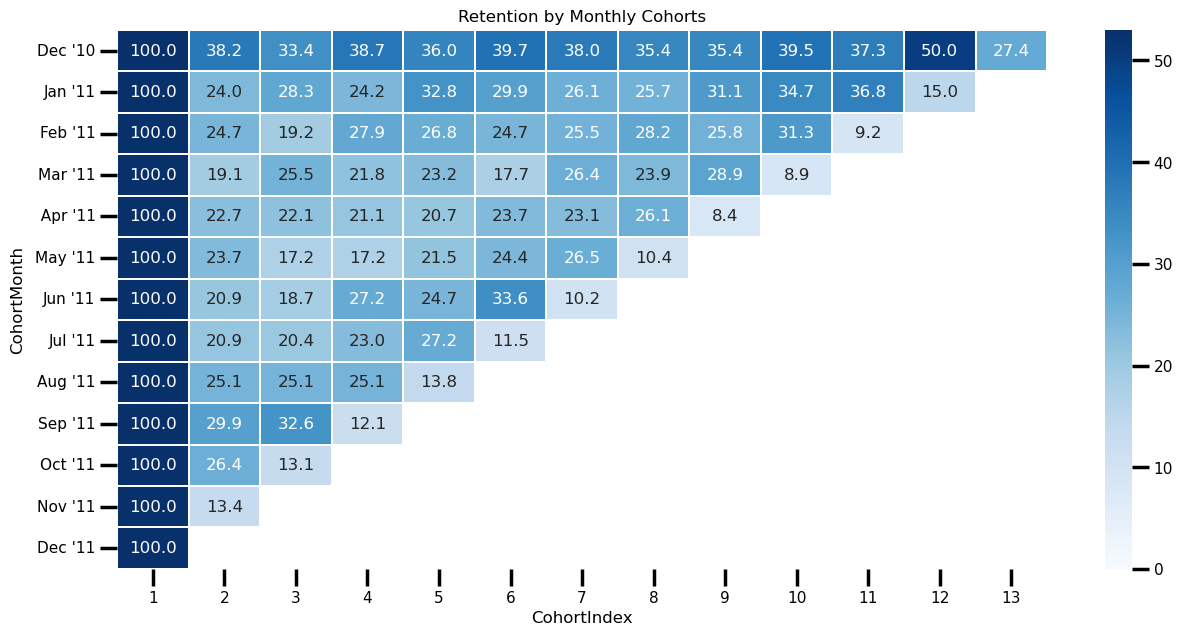

In [27]:
#Retention Rate

grouping = cohort.groupby(['CohortMonth','CohortIndex'])

#No. of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes,axis=0)*100

#print(cohort_counts)
     

monthlist=["Dec '10","Jan '11","Feb '11","Mar '11","  Apr '11","May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11","Oct '11", "Nov '11", "Dec '11"]

plt.figure(figsize=(15,7))

plt.title('Retention by Monthly Cohorts')

sns.heatmap(data=retention,annot=True,cmap='Blues',vmin=0.0,vmax = list(retention.max().sort_values(ascending = False))[1]+3,linewidth=0.3,fmt = '.1f',yticklabels=monthlist)

plt.show()

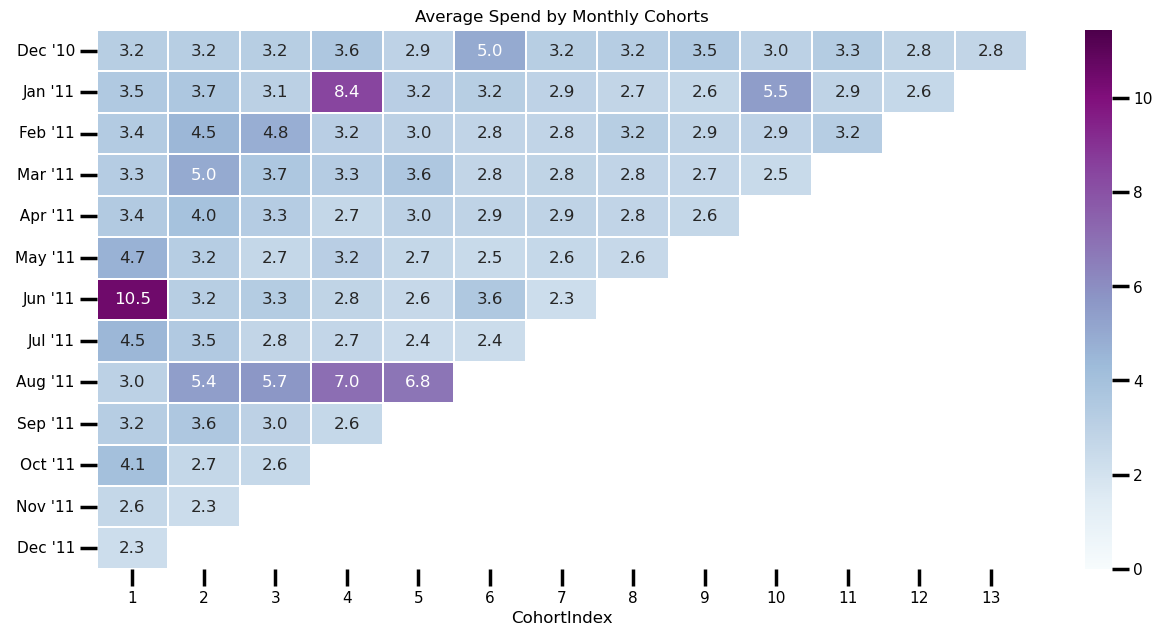

In [28]:
#Average price per Cohort

grouping = cohort.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['UnitPrice'].mean()
cohort_data = cohort_data.reset_index()
average_price = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='UnitPrice')
average_price.round(1)
average_price.index = average_price.index.date
     

plt.figure(figsize=(15,7))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(average_price,annot=True,vmin=0.0,cmap='BuPu',vmax=list(average_price.max().sort_values(ascending=False))[1]+3,fmt='.1f',linewidths=0.3,yticklabels=monthlist)
plt.show()

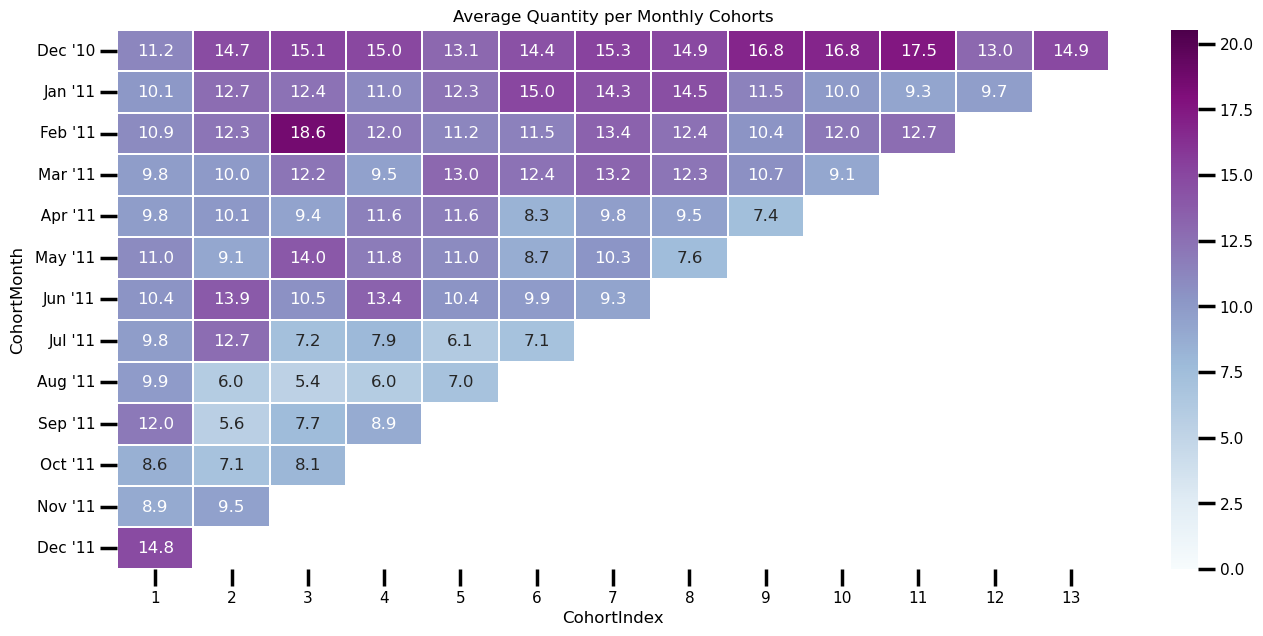

In [29]:
#Average Quantity per Cohort

grouping = cohort.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')

     

plt.figure(figsize=(16,7))
plt.title('Average Quantity per Monthly Cohorts')
sns.heatmap(average_quantity,vmin=0.0,vmax=list(average_quantity.max().sort_values(ascending=False))[1]+3,cmap='BuPu',linewidth=0.3,fmt='.1f',yticklabels=monthlist,annot=True)
plt.show()


In [32]:
rfm_train['InvoiceDate'].max()


'9/30/2011 9:45'

In [33]:
current_date = dt.date(2011,12,10)

In [34]:

rfm_train['InvoiceDate'] = pd.to_datetime(rfm_train['InvoiceDate'], errors='coerce')

rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date

print(rfm_train['Purchase_Date'])
     

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Purchase_Date, Length: 401604, dtype: object


In [35]:
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [36]:
recency = recency.assign(Current_Date=current_date)
recency['Recency'] = recency.Purchase_Date.apply(lambda x:(current_date-x).days)
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346.00,2011-01-18,2011-12-10,326
1,12347.00,2011-12-07,2011-12-10,3
2,12348.00,2011-09-25,2011-12-10,76
3,12349.00,2011-11-21,2011-12-10,19
4,12350.00,2011-02-02,2011-12-10,311


In [37]:
recency.drop(['Purchase_Date','Current_Date'],axis=1,inplace=True)
recency.head()

,CustomerID,Recency
0,12346.00,326
1,12347.00,3
2,12348.00,76
3,12349.00,19
4,12350.00,311


In [38]:
frequency = rfm_train.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})
frequency.head()

,CustomerID,Frequency
0,12346.00,2
1,12347.00,7
2,12348.00,4
3,12349.00,1
4,12350.00,1


In [39]:
rfm_train['TotalCost'] = rfm_train.Quantity*rfm_train.UnitPrice
monetary = rfm_train.groupby('CustomerID').TotalCost.sum().reset_index().rename(columns={'TotalCost':'Monetary'})
monetary.head()
     

,CustomerID,Monetary
0,12346.00,0.00
1,12347.00,4310.00
2,12348.00,1797.24
3,12349.00,1757.55
4,12350.00,334.40


In [40]:
combine = recency.merge(frequency,on='CustomerID')
rfm_table = combine.merge(monetary,on='CustomerID')
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.00,326,2,0.00
12347.00,3,7,4310.00
12348.00,76,4,1797.24
12349.00,19,1,1757.55
12350.00,311,1,334.40


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


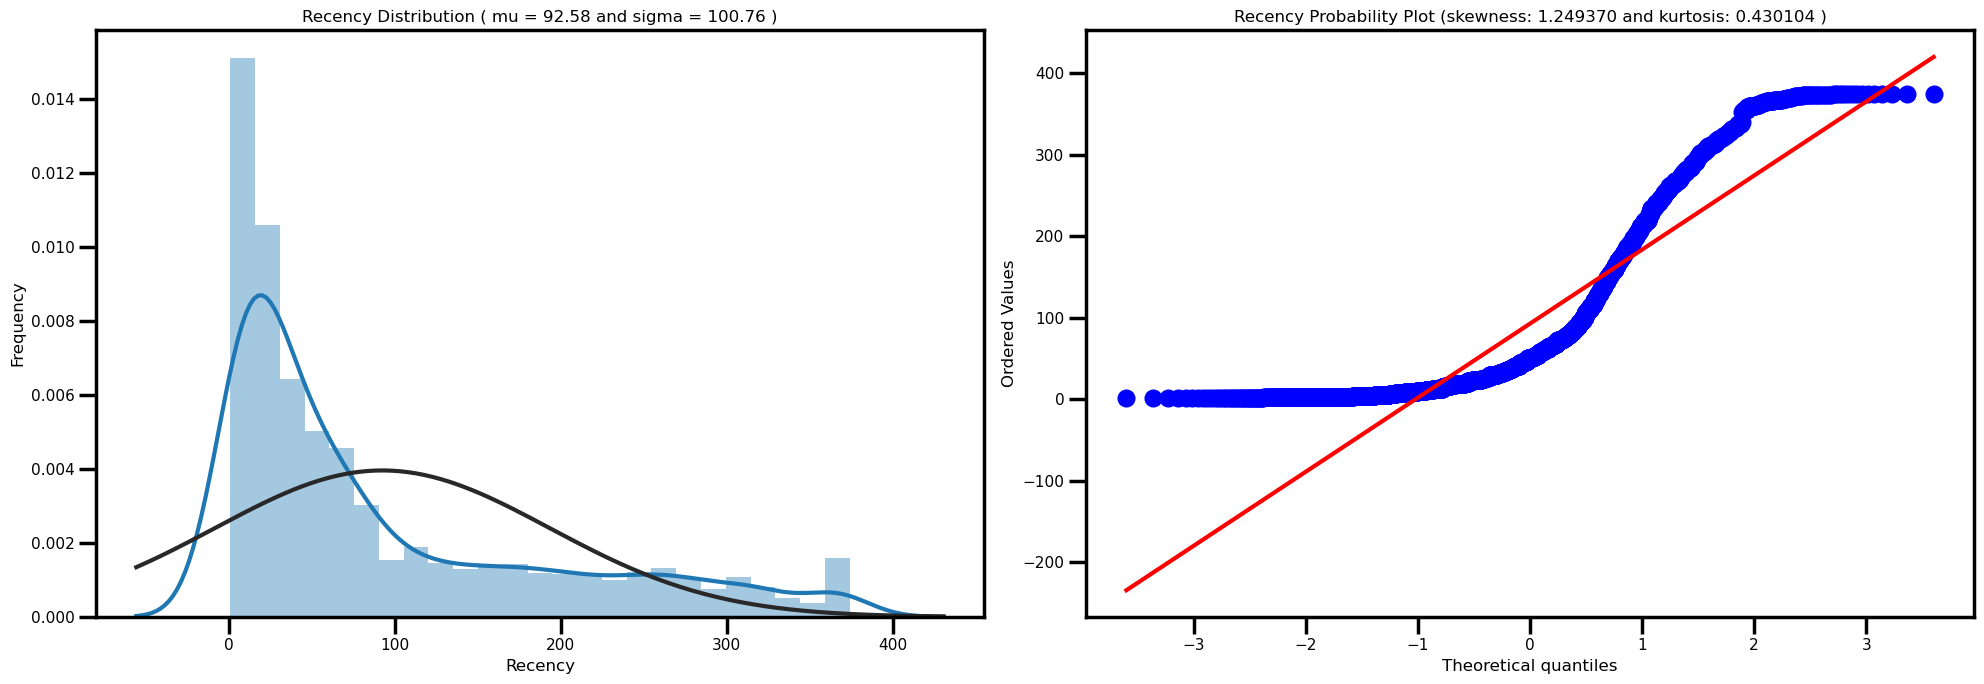

In [41]:
#QQ Plot

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox


def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

     

# Recency 
QQ_plot(rfm_table.Recency,'Recency')

In [48]:
#Customer Segmentation Using Quantiles

quantil = rfm_table.quantile(q=[0.25,0.50,0.75])
print(quantil)
     
 

# Convert quantil into dict to access each value

quantil = quantil.to_dict()
print(quantil)
     
{'Recency': {0.25: 17.0, 0.5: 51.0, 0.75: 144.0}, 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0}, 'Monetary': {0.25: 291.79499999999996, 0.5: 644.0700000000002, 0.75: 1608.335}}

def RecencyPoints(y,rfm,q):
  if y<=q[rfm][0.25]:
    return 4
  elif y<=q[rfm][0.50]:
    return 3
  elif y<=q[rfm][0.75]:
    return 2
  else:
    return 1

def Freq_MonetaryPoints(y,rfm,q):
    if y <= q[rfm][0.25]:
        return 1
    elif y <= q[rfm][0.50]:
        return 2
    elif y <= q[rfm][0.75]: 
        return 3
    else:
        return 4

rfm_segment = rfm_table.copy()
rfm_segment['Recency_Quartile'] = rfm_segment['Recency'].apply(RecencyPoints,args=('Recency',quantil,))
rfm_segment['Frequency_Quartile'] = rfm_segment['Frequency'].apply(Freq_MonetaryPoints,args=('Frequency',quantil,))
rfm_segment['Monetary_Quartile'] = rfm_segment['Monetary'].apply(Freq_MonetaryPoints,args=('Monetary',quantil,))
rfm_segment.head()

      Recency  Frequency  Monetary
0.25    17.00       1.00    291.80
0.50    51.00       3.00    644.07
0.75   144.00       5.00   1608.34
{'Recency': {0.25: 17.0, 0.5: 51.0, 0.75: 144.0}, 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0}, 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}


,Recency,Frequency,Monetary,Recency_Quartile,Frequency_Quartile,Monetary_Quartile
CustomerID,,,,,,
12346.00,326,2,0.00,1,2,1
12347.00,3,7,4310.00,4,4,4
12348.00,76,4,1797.24,2,3,4
12349.00,19,1,1757.55,3,1,4
12350.00,311,1,334.40,1,1,2


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

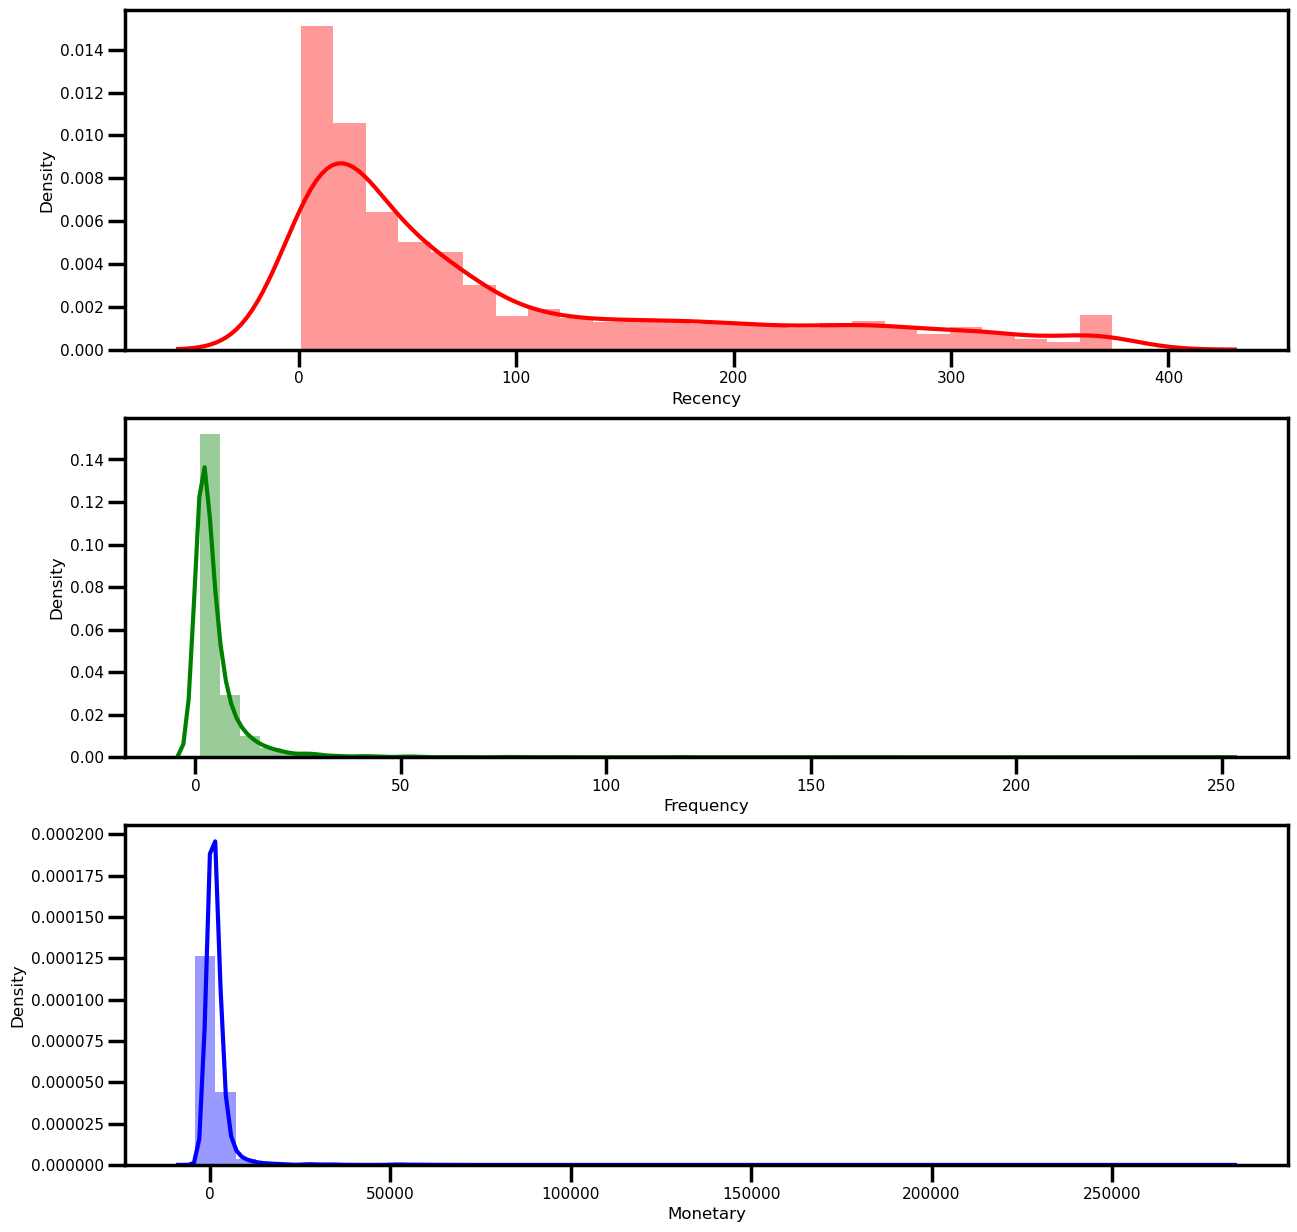

In [49]:
fig,axes = plt.subplots(3,1,figsize=(15,15))
sns.distplot(rfm_table.Recency,color='Red',axlabel='Recency',ax=axes[0])
sns.distplot(rfm_table.Frequency,color='Green',axlabel='Frequency',ax=axes[1])
sns.distplot(rfm_table.Monetary,color='Blue',axlabel='Monetary',ax=axes[2])
plt.show()

In [50]:


rfm_table.describe()

,Recency,Frequency,Monetary
count,4372.00,4372.00,4372.00
mean,92.58,5.08,1893.53
std,100.77,9.34,8218.70
min,1.00,1.00,-4287.63
25%,17.00,1.00,291.80
50%,51.00,3.00,644.07
75%,144.00,5.00,1608.34
max,374.00,248.00,279489.02


In [51]:
scaled_rfm = rfm_table.copy()
scaled_rfm.Monetary = rfm_table.Monetary + abs(rfm_table.Monetary.min())+1
scaled_rfm.Recency = rfm_table.Recency + abs(rfm_table.Recency.min())+1
scaled_rfm.describe()

,Recency,Frequency,Monetary
count,4372.00,4372.00,4372.00
mean,94.58,5.08,6182.16
std,100.77,9.34,8218.70
min,3.00,1.00,1.00
25%,19.00,1.00,4580.43
50%,53.00,3.00,4932.70
75%,146.00,5.00,5896.97
max,376.00,248.00,283777.65


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

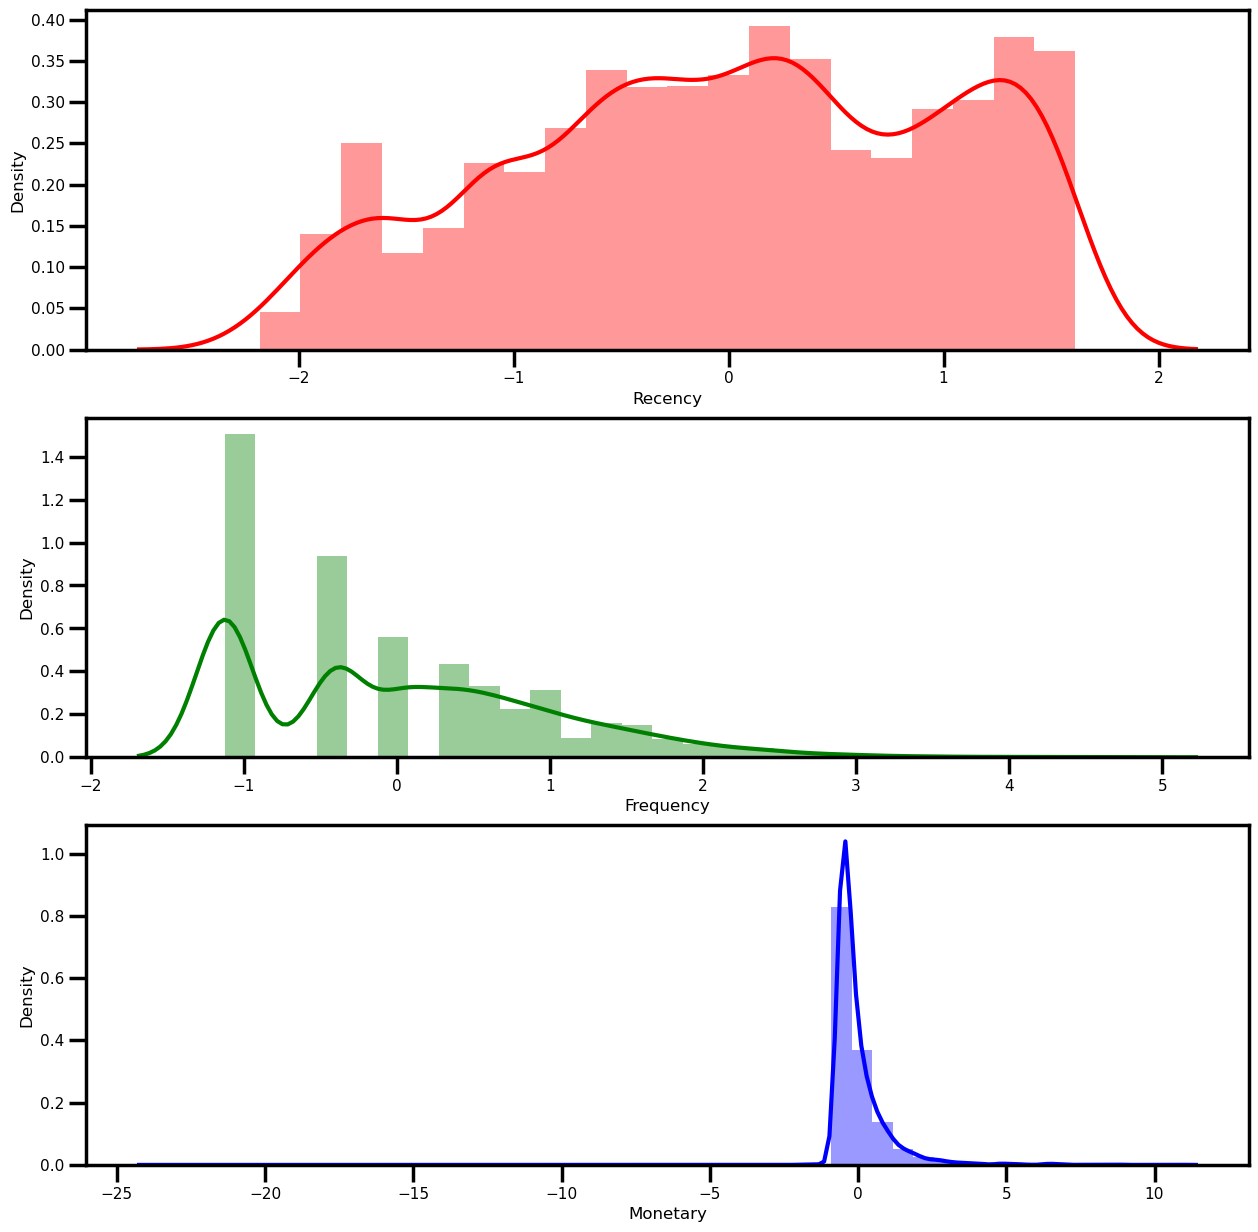

In [52]:
import numpy as np

from sklearn.preprocessing import StandardScaler

log_df = np.log(scaled_rfm)
scal = StandardScaler()
normal_ = scal.fit_transform(log_df)
normal_ = pd.DataFrame(data=normal_,index = rfm_table.index,columns=rfm_table.columns)

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_.Recency , color="Red", ax=axes[0], axlabel='Recency')
sns.distplot(normal_.Frequency , color="Green", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_.Monetary , color="Blue", ax=axes[2], axlabel='Monetary')
plt.show()

Silhouette score for number of cluster(s) 2: 0.4344572903528248
Silhouette score for number of cluster(s) 3: 0.39365200073304357
Silhouette score for number of cluster(s) 4: 0.3401716987239217
Silhouette score for number of cluster(s) 5: 0.36197484746900493


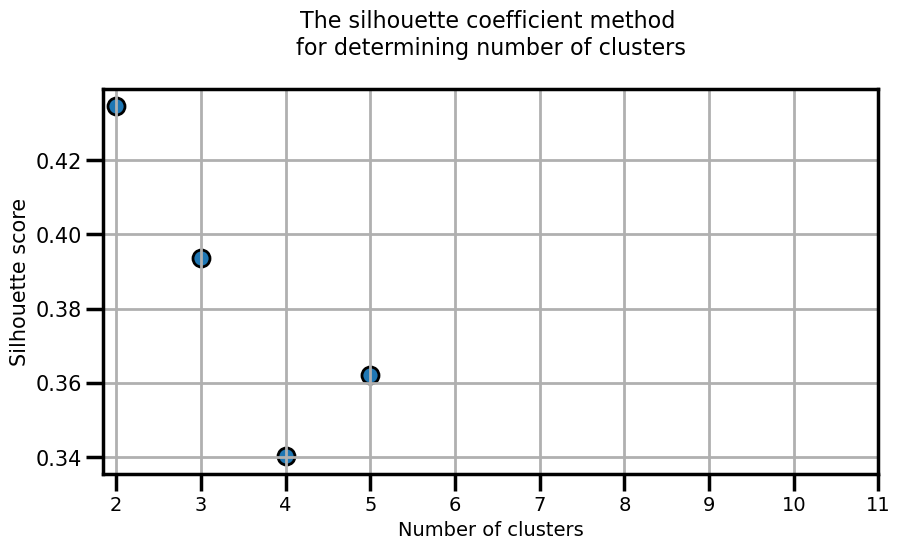

In [53]:

 from sklearn.metrics import silhouette_score
 from sklearn.cluster import KMeans
wcss_silhouette = []
for i in range(2,6):
    kmean = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_)
    predss = kmean.predict(normal_)    
    silhouette = silhouette_score(normal_,predss)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,6)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()
     

In [54]:
rfm_segment = rfm_table.copy()
kme = KMeans(n_clusters=4, random_state=1, init='k-means++')
kme.fit(normal_)
cluster_labels = kme.labels_
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()
     

Shape of cluster label array is (4372,)
Shape of RFM segment dataframe is (4372, 3)


2    1804
1    1219
0    1173
3     176
Name: Cluster, dtype: int64

In [55]:


Cluster_table.sample(10)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
15787.00,27,3,933.26,1
15714.00,12,2,330.03,1
13946.00,80,3,561.57,2
12498.00,22,3,403.70,1
14675.00,17,1,596.36,1
16031.00,93,2,547.90,2
17849.00,219,4,605.80,2
14523.00,109,1,241.09,2
13841.00,253,1,85.00,2


In [56]:


Cluster_table[Cluster_table.Cluster == 3].sample(5)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
18223.00,2,27,6315.23,3
12744.00,52,10,9120.39,3
12477.00,23,9,13117.01,3
14735.00,4,34,5807.69,3
12409.00,79,7,11056.93,3


In [57]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12733.00,235,1,383.95,2
17415.00,80,1,507.84,2
15246.00,239,2,514.15,2
14009.00,199,3,685.93,2
16536.00,108,2,538.17,2


In [58]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
16454.00,45,3,-8.15,1
14529.00,61,3,578.61,1
14157.00,20,3,392.44,1
14593.00,22,3,617.15,1
15857.00,19,1,297.00,1


In [59]:

Cluster_table[Cluster_table.Cluster == 0].sample(5)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
17287.00,27,7,1049.06,0
14092.00,8,17,4063.10,0
14595.00,20,6,1740.60,0
13047.00,32,18,3079.10,0
12856.00,8,8,2153.53,0


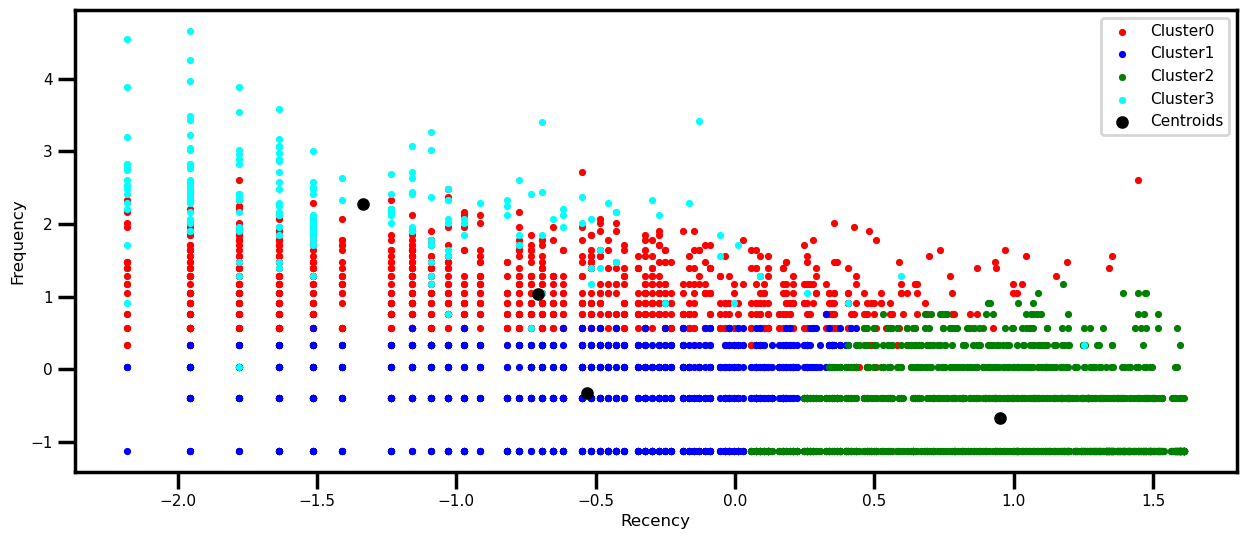

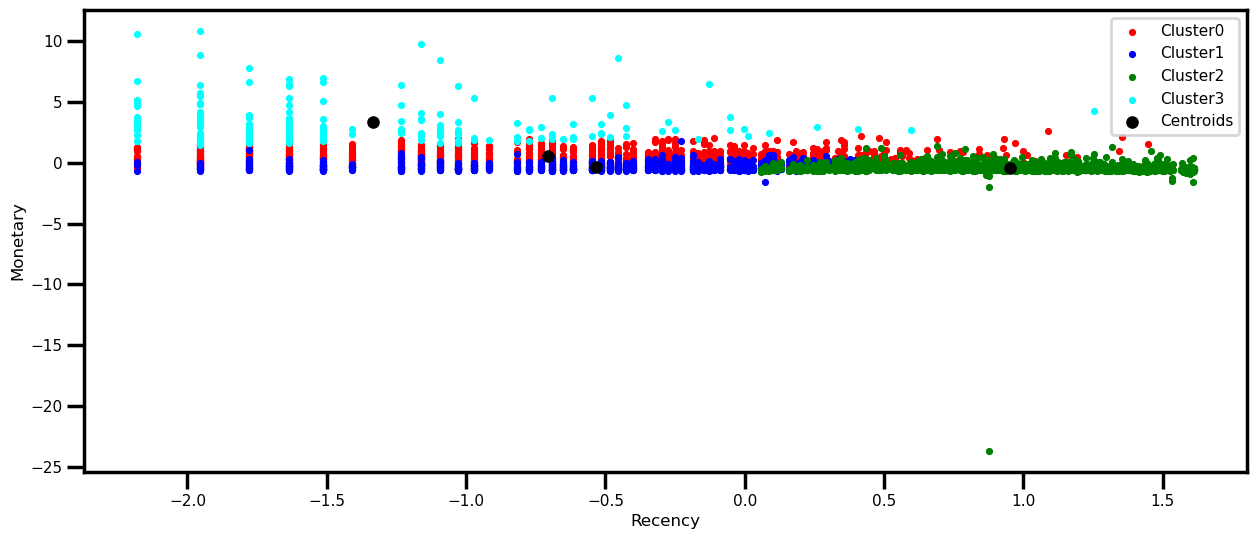

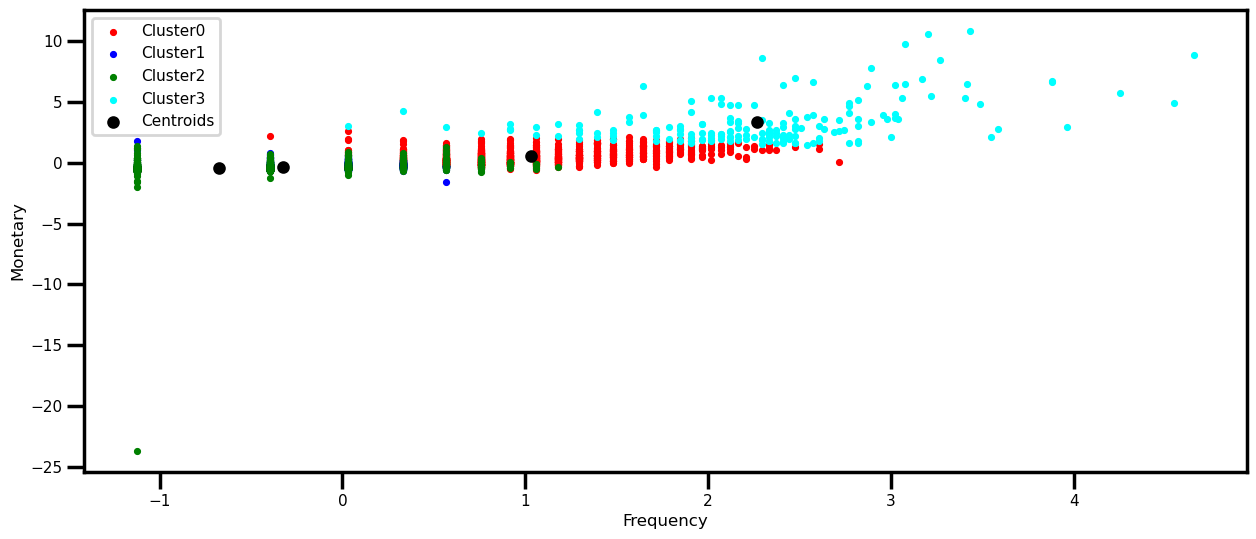

In [60]:
Y = normal_.iloc[:,0:3].values
count=Y.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(Y[cluster_labels == 0, i], Y[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(Y[cluster_labels == 1, i], Y[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(Y[cluster_labels == 2, i], Y[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(Y[cluster_labels == 3, i], Y[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kme.cluster_centers_[:,i], kme.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_.columns[i])
        plt.ylabel(normal_.columns[j])
        plt.legend()        
        plt.show();

In [62]:
normal_ = normal_.assign(Cluster = cluster_labels)

# Melt normalized dataframe into long form to have all metric in same column
normal_melt = pd.melt(normal_.reset_index(),
                      id_vars=['CustomerID','Cluster'],
                      value_vars=['Recency', 'Frequency', 'Monetary'],
                      var_name='Metric',
                      value_name='Value')
normal_melt.head()

,CustomerID,Cluster,Metric,Value
0,12346.00,2,Recency,1.50
1,12347.00,0,Recency,-1.78
2,12348.00,1,Recency,0.38
3,12349.00,1,Recency,-0.65
4,12350.00,2,Recency,1.47


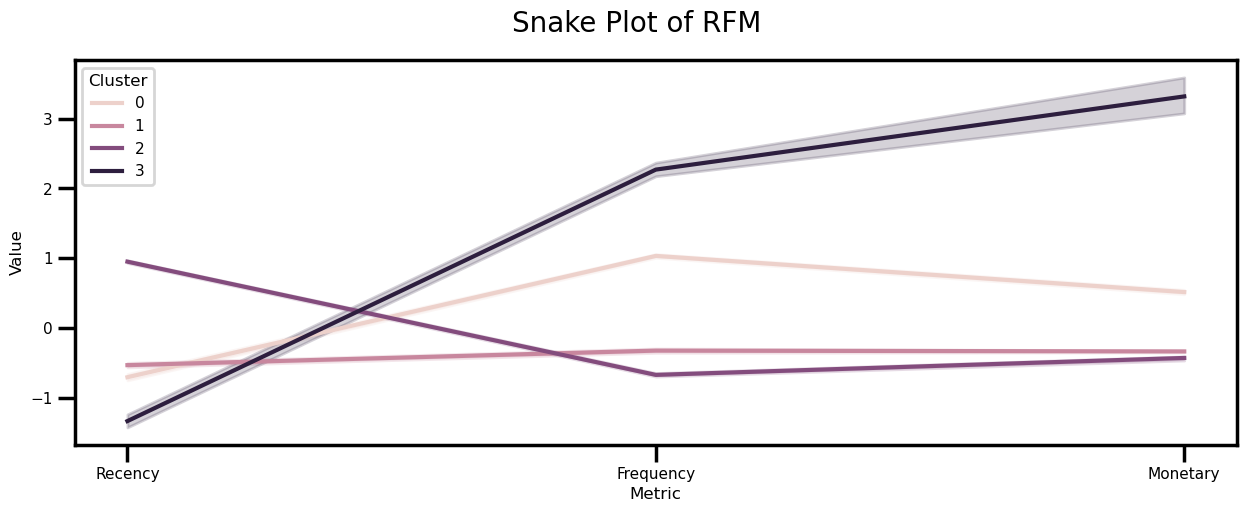

In [63]:

plt.figure(figsize=(15,5))
sns.lineplot(x = 'Metric',y = 'Value',hue = 'Cluster',data = normal_melt)
plt.suptitle("Snake Plot of RFM",fontsize=20)
plt.show()